# Gold Price Prediction




# **Import Libraries**

In [36]:
#Pandas helps you to perform data analysis and data manipulation in Python language
import pandas as pd

#NumPy is one of the most essential Python Libraries for scientific computing
import numpy as np

#Matplotlib is the most popular library for exploration and Basic data visualization in the Python 
import matplotlib.pyplot as plt

#%matplotlib inline sets the backend of matplotlib to the 'inline' backend.
%matplotlib inline

#Seaborn for  high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


import calendar
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox
from scipy import stats

#The warn() function defined in the ' warning ' module is used to show ... is not displayed 
import warnings
warnings.filterwarnings('ignore')



# Dataset as a series object for time series analysis

In [37]:

gd_series = pd.read_csv("Gold_data.csv", header=0, index_col=0, parse_dates=True, squeeze=True)

gd_series

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

In [38]:
gd_series.describe()

count    2182.000000
mean     3284.450046
std       719.564434
min      2252.600000
25%      2697.020000
50%      2879.800000
75%      4147.325000
max      4966.300000
Name: price, dtype: float64

In [39]:
#check data for january 2016
gd_series['2017-01']

date
2017-01-01    2570.266667
2017-01-02    2606.500000
2017-01-03    2658.800000
2017-01-04    2635.600000
2017-01-05    2612.400000
2017-01-06    2614.500000
2017-01-07    2614.700000
2017-01-08    2614.900000
2017-01-09    2705.200000
2017-01-10    2675.950000
2017-01-11    2646.700000
2017-01-12    2642.700000
2017-01-13    2604.900000
2017-01-14    2613.066667
2017-01-15    2621.233333
2017-01-16    2629.400000
2017-01-17    2651.100000
2017-01-18    2656.100000
2017-01-19    2614.400000
2017-01-20    2622.300000
2017-01-21    2631.966667
2017-01-22    2641.633333
2017-01-23    2651.300000
2017-01-24    2661.100000
2017-01-25    2610.000000
2017-01-26    2603.800000
2017-01-27    2589.000000
2017-01-28    2591.433333
2017-01-29    2593.866667
2017-01-30    2596.300000
2017-01-31    2627.300000
Name: price, dtype: float64

# Dataset Description

**Reading Dataset**

In [40]:
gold_d = pd.read_csv('Gold_data.csv')

In [41]:
gold_d

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


**About Data**

Data for this study is collected from **January 1st 2016** to **December 21st 2021** With their respective **Price**. The data has **2182 rows in total and 2 columns in total**. 

**1. Dataset preview**

In [42]:
gold_d.head(10)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70
6,2016-01-07,2903.80
7,2016-01-08,2887.80
8,2016-01-09,2813.80
9,2016-01-10,2786.80


In [43]:
gold_d.tail(10)

,date,price
2172,2021-12-12,4333.5
2173,2021-12-13,4351.4
2174,2021-12-14,4328.2
2175,2021-12-15,4348.7
2176,2021-12-16,4399.8
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


**2. Dataset Shape**

In [44]:
gold_d.shape

(2182, 2)

**Conclusion:** There are 2182 rows and 2 columns in the dataset

**3. Dataset Info**

In [45]:
gold_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


**4. Describe Dataset**

Getting the statistical measures of the data( only for numerical columns)

In [46]:
gold_d.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


# Exploratory Data Analysis

**1. Find unwanted columns**

There is no unwanted column present in given dataset to remove

**2. Checking for missing values**

In [47]:
gold_d.isna().sum()

date     0
price    0
dtype: int64

No missing value found

**3. Find features with one values (unique values)**

In [48]:
for column in gold_d.columns:
    print(column,gold_d[column].unique())

date ['2016-01-01' '2016-01-02' '2016-01-03' ... '2021-12-19' '2021-12-20'
 '2021-12-21']
price [2252.6 2454.5 2708.1 ... 4389.5 4354.1 4346.5]


**4. Explore the categorical features**

In [49]:
categorical_features=[feature for feature in gold_d.columns if ((gold_d[feature].dtypes=='O'))] # 'O' stands for Object dtype
categorical_features

['date']

In [50]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(gold_d[feature].unique())))
    
#(str.format()) is technique of the string category permits you to try and do variable substitutions and data formatting.
#format()enables you to concatenate parts of a string at desired intervals through point data format.

The feature is date and number of categories are 2182


There is one categorical features i.e **'date'**



**5. find categorical feature distribution**

this step is **Not Applicable** here because  we have only one categorical value i.e date

**6. Relationship Between Categorical Features and label**

This step is also **Not Applicable** here

**7. Explore the numerical features**

We have two types of numerical features 

i. Discrete

ii. Continuous


In [51]:
numerical_features=[feature for feature in gold_d.columns if ((gold_d[feature].dtypes !='O'))]
numerical_features

['price']

In [52]:
gold_d[numerical_features].head()

,price
0,2252.60
1,2454.50
2,2708.10
3,2577.80
4,2597.75


There is one numerical feature i.e **'price'**

**8. Outlier Detection**

**Box PLot**

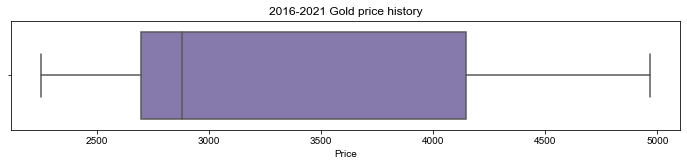

In [53]:

fig = plt.subplots(figsize = (12, 2))
sns.set_theme(style="whitegrid")
sns.boxplot( gold_d['price'],color ='m')
plt.title("2016-2021 Gold price history")
plt.xlabel('Price')
plt.show()

**Distplot**

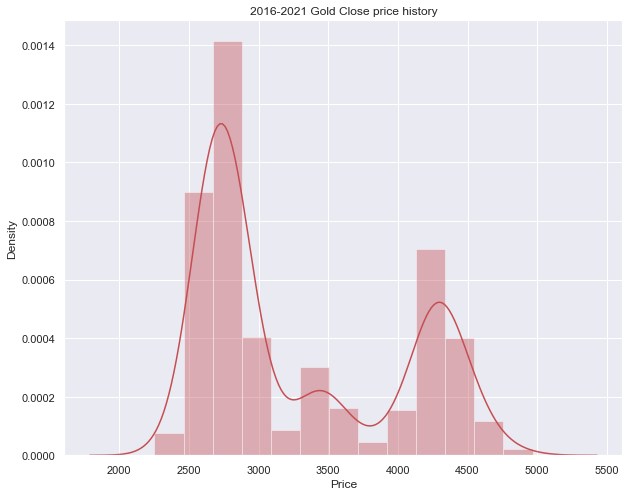

In [54]:

sns.set()
fig = plt.subplots(figsize = (10, 8))
sns.distplot(gold_d['price'], color ='r')
plt.title("2016-2021 Gold Close price history")
plt.xlabel('Price')
plt.show()

**Conclusion: No outlier present**

**Histogram and Q-Q plot**

Q-Q plots and Histograms can be used to check the distribution of error terms.

Text(0.5, 1.0, 'Quantile plot for Gold Price')

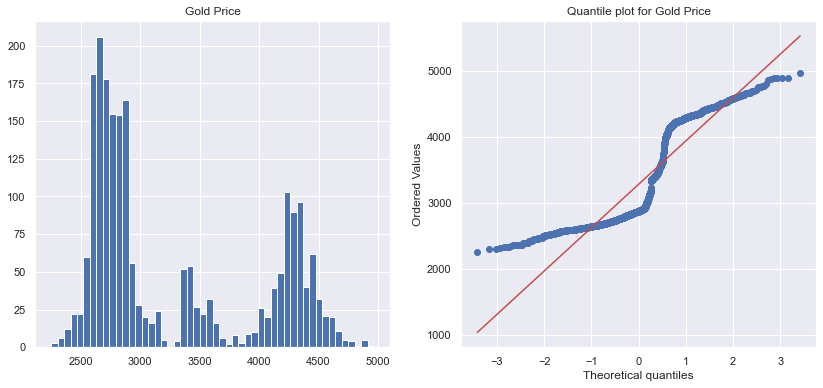

In [55]:
from scipy import stats

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gold_d['price'].hist(bins=50)
plt.title('Gold Price')

plt.subplot(1,2,2)
stats.probplot(gold_d['price'], plot=plt);
plt.title('Quantile plot for Gold Price')

**9. Explore the correlation between Numerical Features**

In [56]:
gold_d.corr()

,price
price,1.0


# Feature Engineering

1. Drop unwanted features
2. Handle missing values
3. Remove outlier
4. Handle feature scaling
5. Handle categorical feature 

**As per Exploratory Data Analysis**

**1.** There is no unwanted column present in given dataset to remove

**2.** no missing value found

**3.** no outliers found


**4. Handle categorical feature: convert date type object into datetime**

In [57]:
# use 'to_datetime() method' and 'set_index() method'

#Pandas to_datetime() method helps to convert string Date time into Python Date time object.

gold_d.columns = ['date', 'price']
gold_d['date'] = pd.to_datetime(gold_d['date']) 
gold_d.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [58]:
gold_d.dtypes

date     datetime64[ns]
price           float64
dtype: object


# Data Analysis By Using Visualization Before for original dataset

**In the given dataset we have only two column 'date' and 'price'**

**Plot**

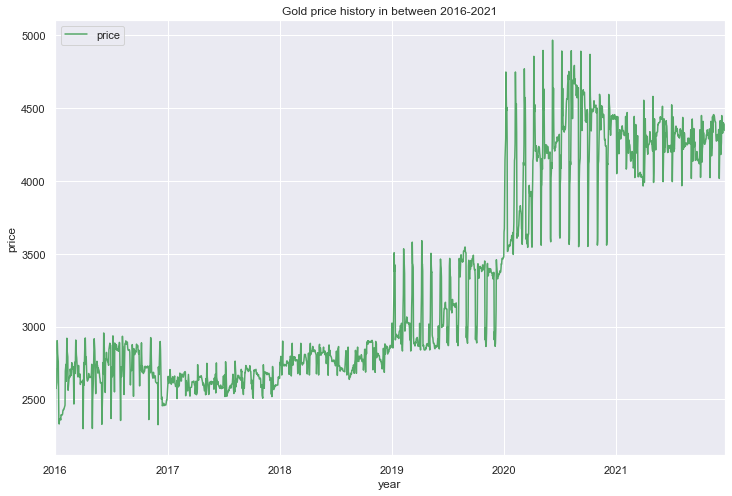

In [59]:
gold_ax = gold_d.plot(x='date',y='price',figsize=(12,8),color='g',grid= True)
gold_ax.set_title('Gold price history in between 2016-2021')
gold_ax.set_xlabel('year')
gold_ax.set_ylabel('price')
gold_ax.legend(loc='upper left')
plt.show()

**Scatter plot**

<function matplotlib.pyplot.show(close=None, block=None)>

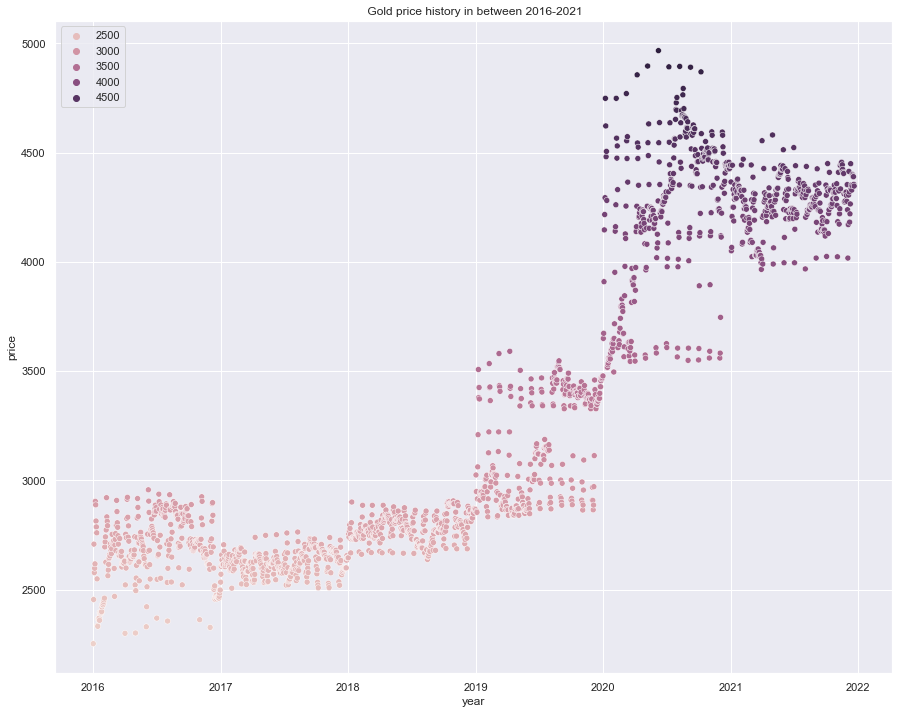

In [60]:
fig = plt.subplots(figsize = (15,12))
sns.scatterplot(data=gold_d,x='date',y='price',hue = 'price')
plt.title(" Gold price history in between 2016-2021")
plt.xlabel('year')
plt.ylabel('price')
plt.grid("darkgrid")
plt.legend(loc='upper left')
plt.show

# Split the date column into Day,Month and Year

In [61]:
gold_d2 = gold_d.copy()
gold_d2.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [62]:
gold_d2['Day'] = gold_d2['date'].dt.day
gold_d2['Month'] = gold_d2['date'].dt.month
gold_d2['Year'] = gold_d2['date'].dt.year
gold_d2.head()

,date,price,Day,Month,Year
0,2016-01-01,2252.60,1,1,2016
1,2016-01-02,2454.50,2,1,2016
2,2016-01-03,2708.10,3,1,2016
3,2016-01-04,2577.80,4,1,2016
4,2016-01-05,2597.75,5,1,2016


In [63]:
# Set date column as index
#Pandas set_index() is a method to set a List, Series or Data frame as index of a Data Frame

gold_dt_index = gold_d2.set_index('date')
gold_dt_index.head()

,price,Day,Month,Year
date,,,,
2016-01-01,2252.60,1,1,2016
2016-01-02,2454.50,2,1,2016
2016-01-03,2708.10,3,1,2016
2016-01-04,2577.80,4,1,2016
2016-01-05,2597.75,5,1,2016


**Now check the correlation** 



In [64]:
corr = gold_d2.corr()

**heatmap creation to check correlation between all coloumns** 

<AxesSubplot:>

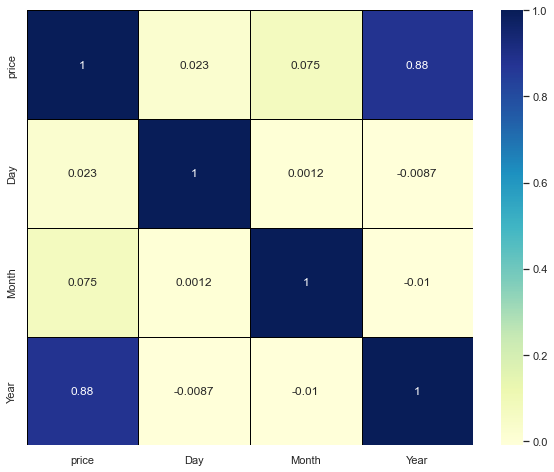

In [65]:
fig = plt.subplots(figsize = (10,8))
sns.heatmap(corr, annot=True, linewidths=.5,linecolor = 'black',cmap="YlGnBu")

**Countplot**

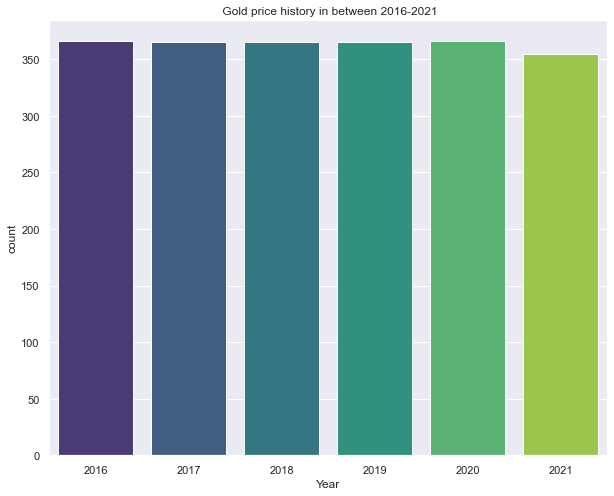

In [66]:
fig = plt.subplots(figsize = (10,8))
sns.countplot(x = 'Year', data = gold_d2, palette = 'viridis')
plt.title(" Gold price history in between 2016-2021")
plt.show()

**Scatterplot**

<function matplotlib.pyplot.show(close=None, block=None)>

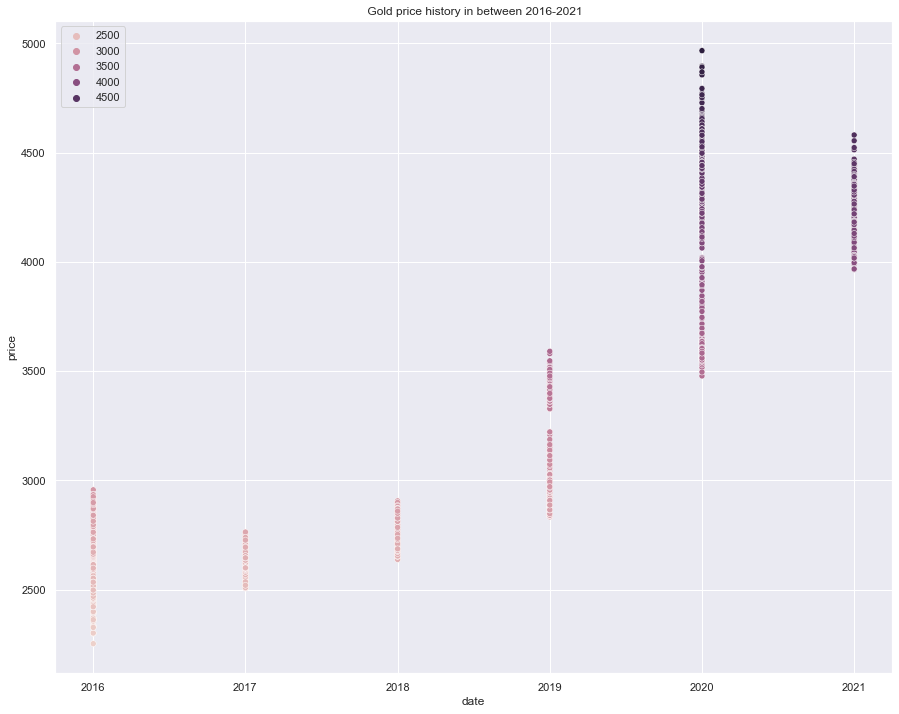

In [67]:
fig = plt.subplots(figsize = (15,12))
sns.scatterplot(data=gold_d2,x='Year',y='price',hue = 'price')
plt.title(" Gold price history in between 2016-2021")
plt.xlabel('date')
plt.ylabel('price')
plt.grid("darkgrid")
plt.legend(loc='upper left')
plt.show

**autocorrelation plot**

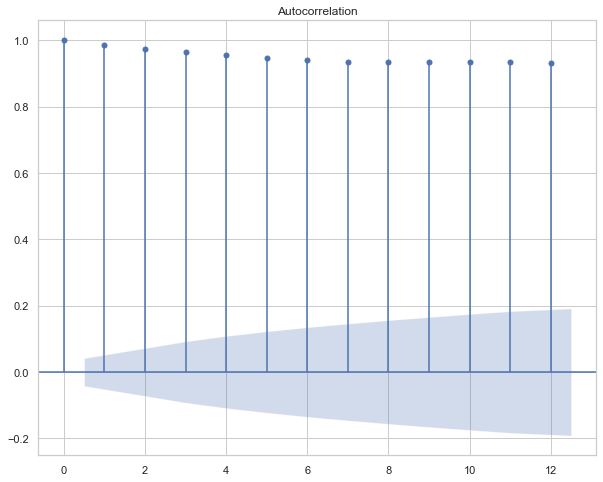

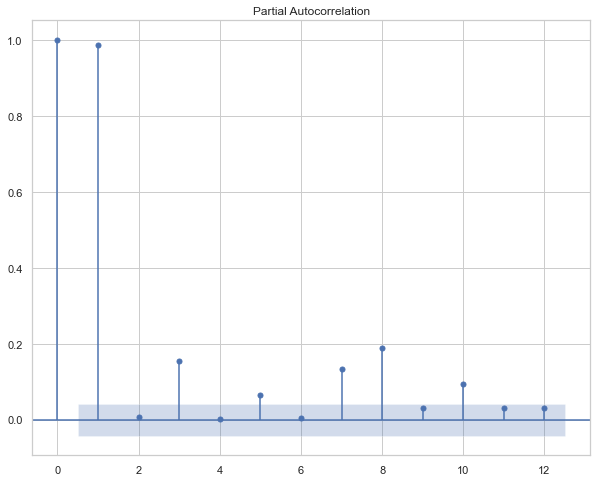

In [92]:
# create an autocorrelation plot

import statsmodels.graphics.tsaplots as tsa_plots
sns.set(rc={'figure.figsize':(10,8)}, style = 'whitegrid')
tsa_plots.plot_acf(gold_d2['price'],lags=12)
tsa_plots.plot_pacf(gold_d2['price'],lags=12)
plt.show()

**Time series decomposition plot**

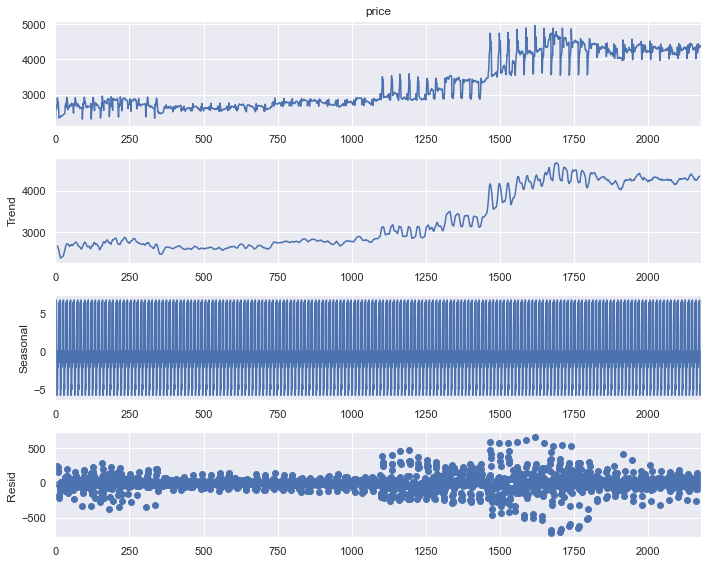

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(rc={'figure.figsize':(10,8)}, style = 'darkgrid')
decompose_ts_add = seasonal_decompose(gold_d2['price'],period=12)
decompose_ts_add.plot()
plt.show()

# Check  average  monthly and yearly gold price

In [94]:
gold_d_month_yearly = pd.pivot_table(gold_d2, values="price",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
gold_d_month_yearly

Year,2016,2017,2018,2019,2020,2021,All
Month,,,,,,,
1,2495.832258,2626.077957,2748.438710,3015.954839,3803.264516,4305.209677,3165.796326
2,2688.703448,2646.730357,2766.942857,3068.482143,3903.472414,4208.853571,3214.831471
3,2682.854839,2597.485484,2766.806452,2989.967742,3915.170968,4118.264516,3178.425000
4,2677.790000,2620.758333,2806.903333,2970.890000,4187.580000,4259.273333,3253.865833
5,2677.650000,2605.872581,2806.258065,2978.335484,4208.000000,4346.348387,3270.410753
6,2745.596667,2607.733333,2781.715000,3098.686667,4250.550000,4262.783333,3291.177500
7,2779.582258,2599.256452,2739.325806,3136.961290,4393.832258,4308.632258,3326.265054
8,2792.240323,2642.133871,2722.327419,3351.954839,4491.829032,4264.919355,3377.567473
9,2792.705000,2669.835000,2777.303333,3310.843333,4399.250000,4207.506667,3359.573889


In [95]:
# Setting the index (month names)
mname_index = [[calendar.month_abbr[i] if isinstance(i, int) 
                            
                else i 
                                       for i in list(gold_d_month_yearly.index)]]  
gold_d_month_yearly = gold_d_month_yearly.set_index(mname_index)

gold_d_month_yearly

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495.832258,2626.077957,2748.438710,3015.954839,3803.264516,4305.209677,3165.796326
Feb,2688.703448,2646.730357,2766.942857,3068.482143,3903.472414,4208.853571,3214.831471
Mar,2682.854839,2597.485484,2766.806452,2989.967742,3915.170968,4118.264516,3178.425000
Apr,2677.790000,2620.758333,2806.903333,2970.890000,4187.580000,4259.273333,3253.865833
May,2677.650000,2605.872581,2806.258065,2978.335484,4208.000000,4346.348387,3270.410753
Jun,2745.596667,2607.733333,2781.715000,3098.686667,4250.550000,4262.783333,3291.177500
Jul,2779.582258,2599.256452,2739.325806,3136.961290,4393.832258,4308.632258,3326.265054
Aug,2792.240323,2642.133871,2722.327419,3351.954839,4491.829032,4264.919355,3377.567473
Sep,2792.705000,2669.835000,2777.303333,3310.843333,4399.250000,4207.506667,3359.573889
Oct,2720.454839,2648.345161,2851.996774,3300.645161,4388.651613,4289.148387,3366.540323


In [96]:
#Check datatype 

gold_d_month_yearly.dtypes

Year
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
All     float64
dtype: object

In [97]:
#change datatype float into int

gold_d_month_yearly = gold_d_month_yearly.astype('int')
gold_d_month_yearly.head()

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495,2626,2748,3015,3803,4305,3165
Feb,2688,2646,2766,3068,3903,4208,3214
Mar,2682,2597,2766,2989,3915,4118,3178
Apr,2677,2620,2806,2970,4187,4259,3253
May,2677,2605,2806,2978,4208,4346,3270


In [98]:
gold_d_month_yearly.dtypes

Year
2016    int32
2017    int32
2018    int32
2019    int32
2020    int32
2021    int32
All     int32
dtype: object

# Visualization for average gold price

**heatmap for average gold price for all months**


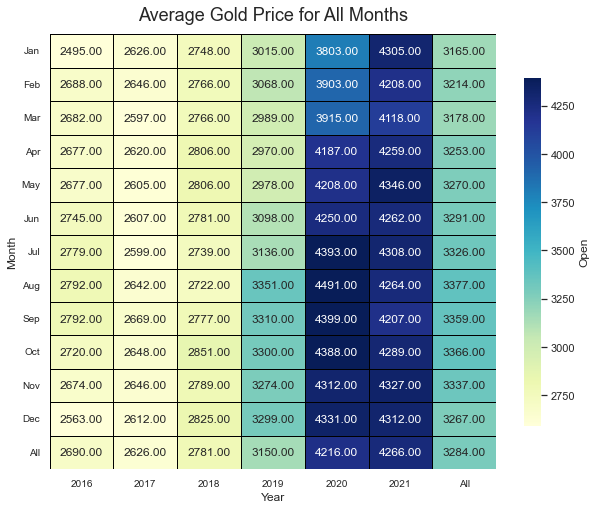

In [99]:

ax = sns.heatmap(gold_d_month_yearly, cmap='YlGnBu', robust=True, fmt='.2f', 
                 annot=True, linewidths=.8,linecolor = 'black', annot_kws={'size':12}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=10)
ax.set_ylabel('Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Gold Price for All Months', fontdict={'fontsize':18},    pad=14);

**Boxplot for average gold price**


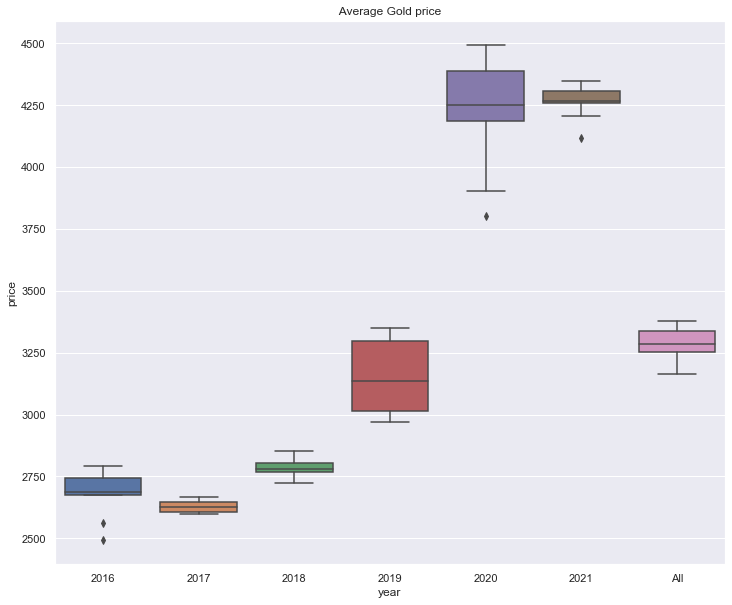

In [100]:
fig = plt.subplots(figsize = (12,10))
sns.boxplot(data = gold_d_month_yearly)
plt.title(" Average Gold price ")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

There is an outlier for year 2016, 2020 and 2021

**Scatterplot for average gold price**

<function matplotlib.pyplot.show(close=None, block=None)>

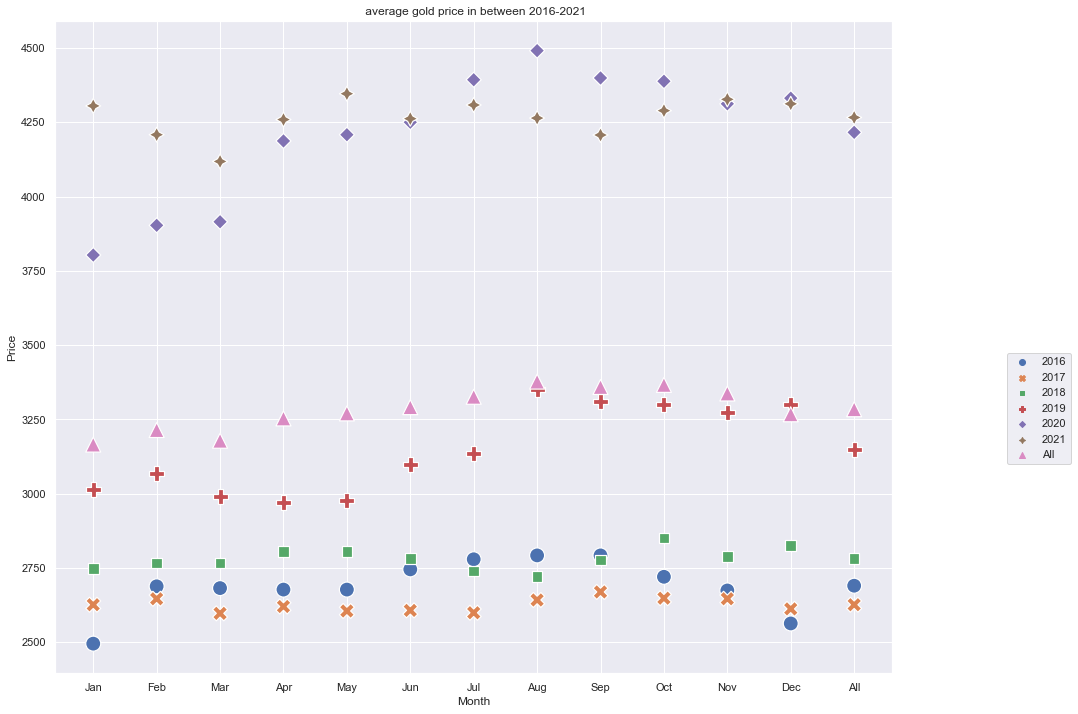

In [101]:
fig = plt.subplots(figsize = (15,12))
ax = sns.scatterplot(data= gold_d_month_yearly,s = 15**2)
plt.title(" average gold price in between 2016-2021")
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.22,0.5), loc= 'upper right')
plt.show

# MODEL Building

In [78]:
DF1 = pd.read_csv("Gold_data.csv", index_col=0, parse_dates = True)
DF1.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [4]:
DF1.tail(5)

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


# Data Driven Forecasting Methods

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

**Splitting Data**

In [13]:
Train = DF1.head(1745)
Test = DF1.tail(437)

# Evaluation Metric RMSE

In [14]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Simple Exponential Method

In [15]:
warnings.filterwarnings('ignore')
ses_model = SimpleExpSmoothing(Train["price"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.price, pred_ses)
rmse_ses_model

277.34283601629176

# Holt method

In [16]:
hw_model = Holt(Train["price"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.price, pred_hw)
rmse_hw_model

1059.2358661105059

# Holts winter exponential smoothing with additive seasonality and additive trend

In [17]:
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.price, pred_hwe_add_add)
rmse_hwe_add_add_model

834.6185916961097

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [18]:
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.price, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

740.4346458052356

# Model based Forecasting Methods

In [19]:
# Data preprocessing for models
DF1["t"] = np.arange(1,2183)
DF1["t_squared"] = DF1["t"]*DF1["t"]

DF1["log_price"] = np.log(DF1["price"])

DF1.head()

,price,t,t_squared,log_price
date,,,,
2016-01-01,2252.60,1,1,7.719840
2016-01-02,2454.50,2,4,7.805678
2016-01-03,2708.10,3,9,7.904003
2016-01-04,2577.80,4,16,7.854692
2016-01-05,2597.75,5,25,7.862401


**Splitting Data**

In [20]:
Train = DF1.head(1745)
Test = DF1.tail(437)

# Linear Model

In [21]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['price'], pred_linear)
rmse_linear_model

336.1625131235669

#  Exponential Model

In [22]:
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['price'], np.exp(pred_Exp))
rmse_Exp_model

337.6983668455393

# Quadratic Model

In [23]:
Quad = smf.ols('price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['price'], pred_Quad)
rmse_Quad_model

1039.1859155442512

In [24]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Model',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model]]

In [25]:
dataf = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
dataf

,Model,RMSE_Value
0,Simple Exponential Method,277.342836
1,Holt method,1059.235866
2,HW exp smoothing add,834.618592
3,HW exp smoothing mult,740.434646
4,Linear Model,336.162513
5,Exp model,337.698367
6,Quad model,1039.185916


# Building final model with least RMSE value

In [26]:
DF1.head(5)

,price,t,t_squared,log_price
date,,,,
2016-01-01,2252.60,1,1,7.719840
2016-01-02,2454.50,2,4,7.805678
2016-01-03,2708.10,3,9,7.904003
2016-01-04,2577.80,4,16,7.854692
2016-01-05,2597.75,5,25,7.862401


In [27]:
DF1.tail(5)

,price,t,t_squared,log_price
date,,,,
2021-12-17,4394.4,2178,4743684,8.388086
2021-12-18,4389.5,2179,4748041,8.386971
2021-12-19,4389.5,2180,4752400,8.386971
2021-12-20,4354.1,2181,4756761,8.378873
2021-12-21,4346.5,2182,4761124,8.377126


In [28]:
final_model = smf.ols('price~t+t_squared',data=DF1).fit()
pred_final = pd.Series(final_model.predict(DF1[['t','t_squared']]))
rmse_final_model = RMSE(DF1['price'], pred_final)
rmse_final_model

280.5534388495902

In [29]:
pred_dataf = pd.DataFrame({'Actual' : DF1.price, 'Predicted' : pred_final})
pred_dataf.tail(30)

,Actual,Predicted
date,,
2021-11-22,4311.2,4743.212491
2021-11-23,4275.0,4745.351703
2021-11-24,4273.5,4747.491979
2021-11-25,4278.3,4749.633321
2021-11-26,4315.7,4751.775729
2021-11-27,4318.9,4753.919201
2021-11-28,4318.9,4756.063739
2021-11-29,4303.9,4758.209342
2021-11-30,4277.0,4760.356010


# Building final model with Holt method

In [104]:
hw_model = Holt(Train["price"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.price, pred_hw)
rmse_hw_model

1059.2358661105059

In [65]:
pred_dataf = pd.DataFrame({'Actual' : DF1.price, 'Predicted' : pred_hw})
pred_dataf.tail(30)

,Actual,Predicted
2021-11-22,4311.2,5865.756899
2021-11-23,4275.0,5869.052755
2021-11-24,4273.5,5872.348610
2021-11-25,4278.3,5875.644466
2021-11-26,4315.7,5878.940322
2021-11-27,4318.9,5882.236177
2021-11-28,4318.9,5885.532033
2021-11-29,4303.9,5888.827889
2021-11-30,4277.0,5892.123744
2021-12-01,4353.2,5895.419600


# Building final model with Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [131]:
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.price, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

740.4346458052356

In [132]:
pred_dataf = pd.DataFrame({'Actual' : DF1.price, 'Predicted' : pred_hwe_mul_add})
pred_dataf.tail(30)


,Actual,Predicted
2021-11-22,4311.2,5468.885391
2021-11-23,4275.0,5388.750472
2021-11-24,4273.5,5317.395465
2021-11-25,4278.3,5182.032965
2021-11-26,4315.7,5431.328027
2021-11-27,4318.9,5444.720159
2021-11-28,4318.9,5390.682938
2021-11-29,4303.9,5259.528739
2021-11-30,4277.0,5308.429059
2021-12-01,4353.2,5363.625488


# ARIMA MODEL

In [13]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
series = read_csv('Gold_data.csv', header=0, index_col=0, parse_dates=True)

In [15]:
series.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [16]:
# Resetting index 
series1 = series.reset_index()
series1.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


<AxesSubplot:xlabel='date'>

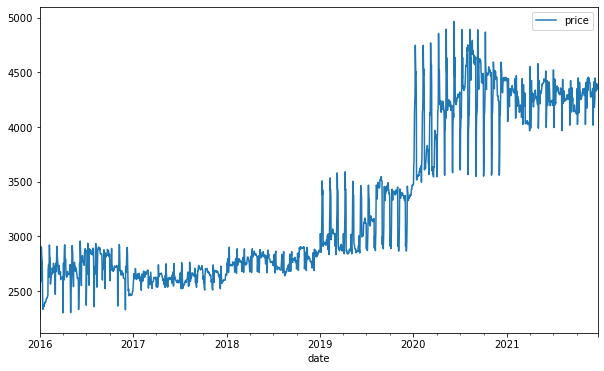

In [17]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()


In [18]:
# separate out a validation dataset (90%-training data and 10% test data)
split_point = len(series) - 437
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 1745, Validation 437


**Persistence/ Base model**


In [19]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

In [20]:
X

array([2252.6, 2454.5, 2708.1, ..., 4869.1, 4586.4, 4519.3], dtype=float32)

In [21]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.1f, Observed =%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=3421.0, Observed =3390.300
>Predicted=3390.3, Observed =3388.400
>Predicted=3388.4, Observed =3403.000
>Predicted=3403.0, Observed =3450.800
>Predicted=3450.8, Observed =2909.700
>Predicted=2909.7, Observed =2992.500
>Predicted=2992.5, Observed =2895.800
>Predicted=2895.8, Observed =2864.000
>Predicted=2864.0, Observed =2886.800
>Predicted=2886.8, Observed =2955.500
>Predicted=2955.5, Observed =3092.900
>Predicted=3092.9, Observed =3414.800
>Predicted=3414.8, Observed =3433.800
>Predicted=3433.8, Observed =3385.000
>Predicted=3385.0, Observed =3347.700
>Predicted=3347.7, Observed =3351.400
>Predicted=3351.4, Observed =3390.800
>Predicted=3390.8, Observed =3399.300
>Predicted=3399.3, Observed =3373.200
>Predicted=3373.2, Observed =3376.300
>Predicted=3376.3, Observed =3376.300
>Predicted=3376.3, Observed =3397.400
>Predicted=3397.4, Observed =3397.200
>Predicted=3397.2, Observed =3393.100
>Predicted=3393.1, Observed =3374.500
>Predicted=3374.5, Observed =3370.200
>Predicted=3

**ARIMA Hyperparameter**

In [22]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


**Grid search for p,d,q values**

In [23]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [24]:
# load dataser
train= pd.read_excel('dataset.xlsx', header = None , index_col =0, parse_dates = True, squeeze =True)
# evaluate parameters
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1134.217
ARIMA(0, 0, 1) RMSE=610.207
ARIMA(0, 0, 2) RMSE=393.925
ARIMA(0, 1, 0) RMSE=119.351
ARIMA(0, 1, 1) RMSE=119.436
ARIMA(0, 1, 2) RMSE=114.989
ARIMA(0, 2, 0) RMSE=169.202
ARIMA(0, 2, 1) RMSE=119.447
ARIMA(0, 2, 2) RMSE=119.532
ARIMA(1, 0, 0) RMSE=120.016
ARIMA(1, 0, 1) RMSE=120.100
ARIMA(1, 0, 2) RMSE=115.743
ARIMA(1, 1, 0) RMSE=119.415
ARIMA(1, 1, 1) RMSE=111.303
ARIMA(1, 1, 2) RMSE=109.768
ARIMA(1, 2, 0) RMSE=160.312
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(2, 0, 0) RMSE=120.079
ARIMA(2, 0, 1) RMSE=113.271
ARIMA(2, 0, 2) RMSE=109.579
ARIMA(2, 1, 0) RMSE=115.616
ARIMA(2, 1, 1) RMSE=110.065
The computed initial MA coefficients are not invertible
You should induce invertibility, ch

**Build model based on the optimized values**



In [1]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
train = read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

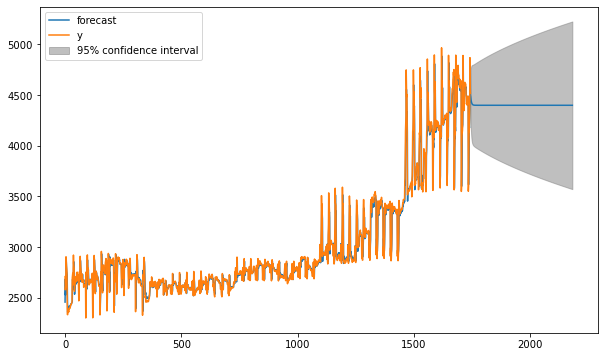

In [29]:
# fit model
model = ARIMA(X, order=(2, 0, 2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=437)[0]
model_fit.plot_predict(2, 2182)
plt.show()

In [30]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

186.50444982478058

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(val[1], forecast)
MAPE

0.03407375632154526